In [2]:
using CairoMakie
using Serialization

data = deserialize("../../data/rawwalks/saw.jls")[50]

49×50000 Matrix{Int8}:
 4  4  4  4  1  1  3  4  2  1  3  3  2  …  3  3  4  1  3  1  4  4  3  4  2  3
 3  1  1  1  4  4  3  1  2  4  2  3  2     2  3  3  4  3  4  3  3  3  4  2  3
 2  4  4  2  4  1  2  1  2  1  1  3  3     2  2  3  1  2  1  3  4  2  1  1  3
 2  4  1  1  1  2  3  1  2  4  1  3  4     1  2  2  1  2  1  4  1  3  4  4  2
 3  1  2  2  1  1  4  4  3  3  2  3  3     4  1  2  4  3  4  3  1  3  1  1  3
 2  1  1  1  1  4  4  1  3  3  2  4  2  …  1  1  2  4  2  4  3  4  3  4  2  4
 2  2  4  4  1  1  4  2  3  4  3  4  3     2  4  1  3  1  1  4  1  4  4  1  3
 2  1  1  1  2  1  1  1  2  1  2  3  3     2  1  2  3  2  1  1  4  4  3  4  4
 1  2  1  1  3  4  4  1  2  4  3  3  3     3  1  1  4  3  4  4  1  4  3  4  4
 2  1  2  1  3  4  1  1  2  3  2  4  4     3  4  2  3  3  1  3  4  3  3  4  3
 3  1  2  1  2  3  1  1  1  3  3  3  1  …  3  3  2  3  4  2  3  4  4  4  1  3
 2  2  2  1  2  3  1  4  4  4  4  4  4     3  4  2  2  3  2  3  4  3  4  4  2
 1  1  2  1  1  4  1  1  1  4  4  3  4   

In [3]:
function gen_xy(steps)
    xs = Int8[0]
    ys = Int8[0]
    for x in steps
        if x == 1
            push!(ys, ys[end] + 1)
            push!(xs, xs[end])
        elseif x == 2
            push!(xs, xs[end] + 1)
            push!(ys, ys[end])
        elseif x == 3
            push!(ys, ys[end] - 1)
            push!(xs, xs[end])
        elseif x == 4
            push!(xs, xs[end] - 1)
            push!(ys, ys[end])
        else
            error("Invalid step")
        end
    end
    (xs, ys)
end

gen_xy (generic function with 1 method)

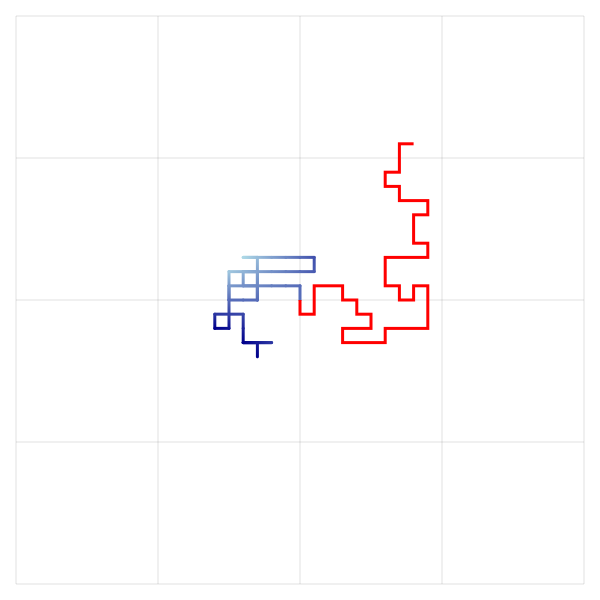

In [66]:
f = Figure(resolution = (600, 600))
ax = Axis(f[1,1], aspect = 1)

rsteps = rand(1:4, 49)
(rxs, rys) = gen_xy(rsteps)
lines!(rxs, rys, linewidth=3, colormap = :blues, color = rxs .* rys)

(xs,ys) = gen_xy(data[:,11])
lines!(xs,ys, color=:red, linewidth=3)
hidespines!(current_axis())
hidedecorations!(current_axis(), grid=false, ticks=true, minorgrid=false)
xlims!(current_axis(), -20, 20)
ylims!(current_axis(), -20, 20)

f = current_figure()

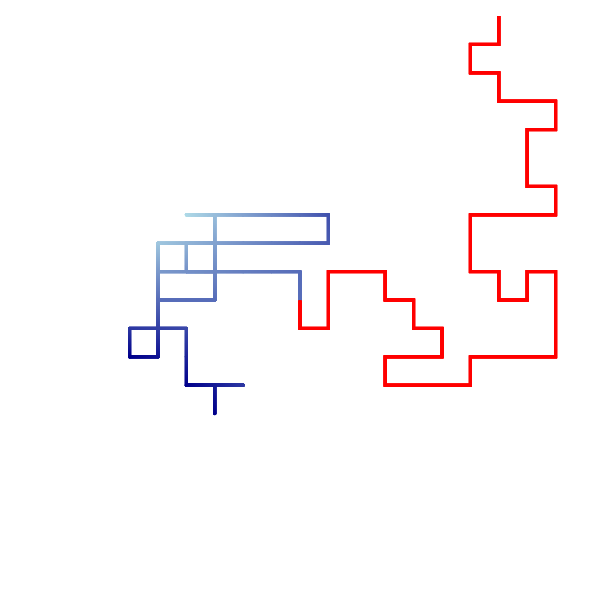

In [73]:
lines!(rxs, rys, linewidth=3, colormap = :blues, color = rxs .* rys)
lines!(xs,ys, color=:red, linewidth=3)
hidespines!(current_axis())
hidedecorations!(current_axis(), grid=true, ticks=true, minorgrid=true)
xlims!(current_axis(), -10, 10)
ylims!(current_axis(), -10, 10)


current_figure()


In [74]:
f = current_figure()
save("example_saw.svg", f)